In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [15]:
df = pd.read_csv('../data/graph-dataset/semester-2/form-tabular/form_df_0.csv')

for i in range(1, 22):
    temp = pd.read_csv(f'../data/graph-dataset/semester-2/form-tabular/form_df_{i}.csv')
    df = pd.concat([df, temp])

df.shape

C:\Users\szmid\AppData\Local\Temp\ipykernel_22152\2879296468.py:4: DtypeWarning: Columns (2,765) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(f'../data/graph-dataset/semester-2/form-tabular/form_df_{i}.csv')


(566751, 1121)

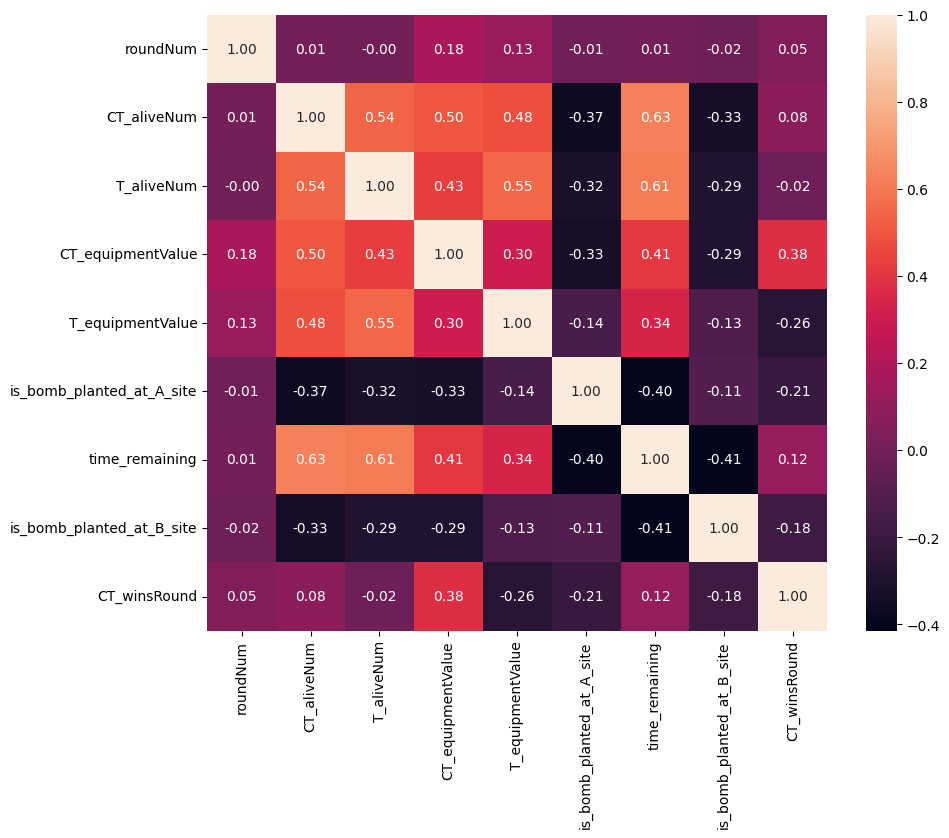

In [101]:
overall_columns = [col for col in df.columns if 'player' not in col]
overall_columns = [col for col in overall_columns if 'match_id' != col]
overall_columns = [col for col in overall_columns if 'bomb_mx_pos' not in col]
overall_columns = [col for col in overall_columns if 'bomb_X' not in col]
overall_columns = [col for col in overall_columns if 'bomb_Y' not in col]
overall_columns = [col for col in overall_columns if 'bomb_Z' not in col]
overall_columns = [col for col in overall_columns if 'tick' != col]
overall_columns = [col for col in overall_columns if 'tScore' != col]
overall_columns = [col for col in overall_columns if 'ctScore' != col]
overall_columns = [col for col in overall_columns if 'endCTScore' != col]
overall_columns = [col for col in overall_columns if 'endTScore' != col]
overall_columns = [col for col in overall_columns if 'CT_winsRound' != col]
overall_columns = [col for col in overall_columns if 'is_bomb_being_planted' != col]
overall_columns = [col for col in overall_columns if 'is_bomb_being_defused' != col]
overall_columns = [col for col in overall_columns if 'is_bomb_defused' != col]
overall_columns = [col for col in overall_columns if 'numerical_match_id' != col]
overall_columns.extend(['CT_winsRound'])

dfc = df[overall_columns]

plt.figure(figsize=(10,8))
sns.heatmap(dfc.corr(), annot=True, fmt=".2f");

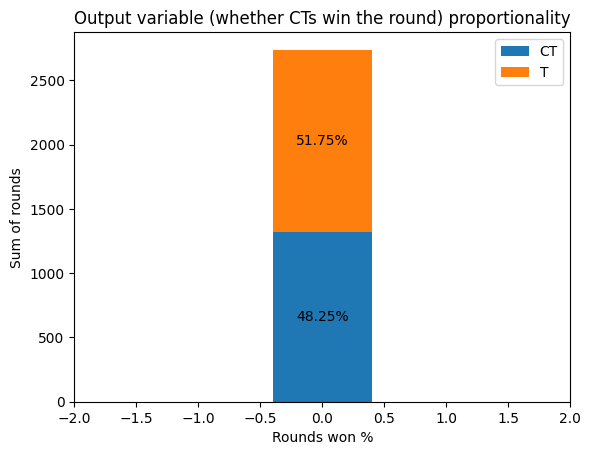

In [28]:
temp_df = df[['match_id', 'roundNum', 'CT_winsRound']].drop_duplicates()

ct_win_sum = temp_df['CT_winsRound'].sum()
t_win_sum = len(temp_df) - ct_win_sum

plt.bar(0, ct_win_sum, label="CT")
plt.bar(0, t_win_sum, bottom=ct_win_sum, label='T')
plt.text(0, ct_win_sum / 2, f"{round(ct_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
plt.text(0, ct_win_sum + t_win_sum / 2, f"{round(t_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
plt.title("Output variable (whether CTs win the round) proportionality")
plt.xlim(-2, 2)
plt.xlabel("Rounds won %")
plt.ylabel("Sum of rounds")
plt.legend()
plt.show()

In [56]:
temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_winsRound']].drop_duplicates()
temp_df['one'] = 1
temp_df['group_size'] = temp_df.groupby(by="time_remaining")['one'].transform('sum')
temp_df['group_win'] = temp_df.groupby(by="time_remaining")['CT_winsRound'].transform('sum')
temp_df['group_win_rate'] = temp_df['group_win'] / temp_df['group_size']
temp_df['group_loss_rate'] = 1 - temp_df['group_win_rate']
temp_df

rdf = temp_df[['time_remaining', 'group_win_rate', 'group_loss_rate']].drop_duplicates().sort_values(by='time_remaining', ascending=False)
rdf['sec'] = round(rdf['time_remaining'])
rdf['mean_win_rate'] = rdf.groupby(by='sec')['group_win_rate'].transform('mean')
rdf['mean_loss_rate'] = rdf.groupby(by='sec')['group_loss_rate'].transform('mean')
rdf = rdf.drop_duplicates(subset='sec')
rdf

,time_remaining,group_win_rate,group_loss_rate,sec,mean_win_rate,mean_loss_rate
0,115.000000,0.482469,0.517531,115.0,0.482469,0.517531
1,114.500000,0.482469,0.517531,114.0,0.362293,0.637707
8122,113.492188,0.000000,1.000000,113.0,0.113949,0.886051
5,112.500000,0.483682,0.516318,112.0,0.220848,0.779152
345,111.492188,0.300000,0.700000,111.0,0.129387,0.870613
...,...,...,...,...,...,...
10860,-11.640625,0.000000,1.000000,-12.0,0.142857,0.857143
10862,-12.640625,0.000000,1.000000,-13.0,0.000000,1.000000
10864,-13.640625,0.000000,1.000000,-14.0,0.000000,1.000000
10866,-14.640625,0.000000,1.000000,-15.0,0.000000,1.000000


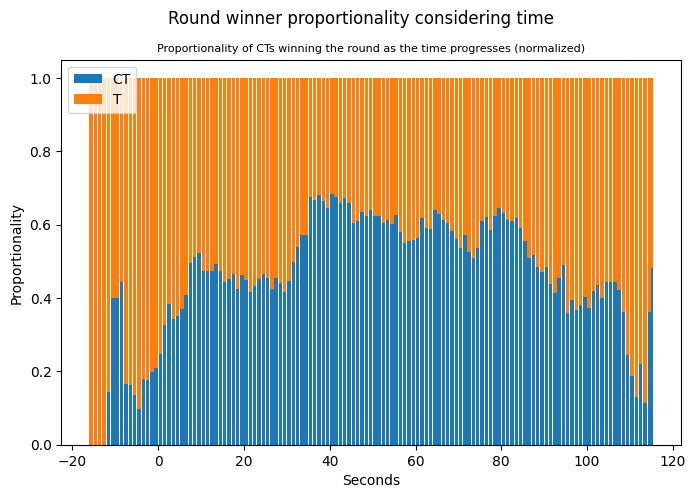

In [60]:
fig, axs = plt.subplots(figsize=(8,5))
fig.suptitle("Round winner proportionality considering time")

axs.bar(rdf['time_remaining'], rdf['mean_win_rate'], label="CT")
axs.bar(rdf['time_remaining'], rdf['mean_loss_rate'], bottom=rdf['mean_win_rate'], label='T')
axs.set_xlabel("Seconds")
axs.set_ylabel("Proportionality")
axs.set_title("Proportionality of CTs winning the round as the time progresses (normalized)", fontsize=8)
axs.legend();

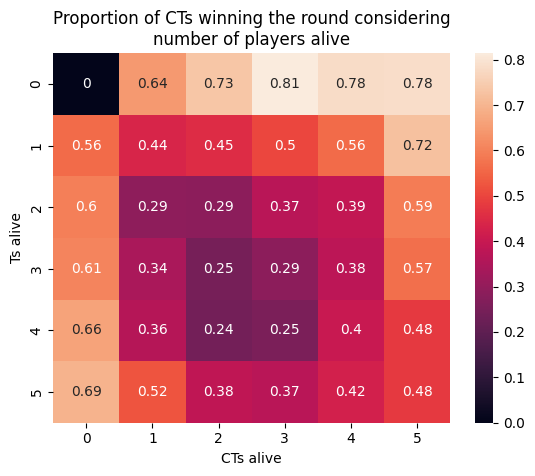

In [61]:
temp_df = df[['match_id', 'roundNum', 'CT_aliveNum', 'T_aliveNum', 'CT_winsRound']].drop_duplicates()
mx = np.zeros((6,6))

for t_alive in range(0,6):
    for ct_alive in range(0,6):
        mx[t_alive][ct_alive] = len(df.loc[(df['CT_aliveNum'] == ct_alive) & (df['T_aliveNum'] == t_alive) & (df['CT_winsRound'] == 1)]) /\
                        len(df.loc[(df['CT_aliveNum'] == ct_alive) & (df['T_aliveNum'] == t_alive)])

sns.heatmap(mx, annot=True);
plt.title("Proportion of CTs winning the round considering\nnumber of players alive", fontsize=12)
plt.xlabel('CTs alive')
plt.ylabel('Ts alive');

In [102]:
temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_aliveNum', 'T_aliveNum', 'CT_equipmentValue', 'T_equipmentValue']].drop_duplicates()
temp_df['sec'] = round(temp_df['time_remaining'])
temp_df = temp_df.drop(columns=['time_remaining'])
temp_df = temp_df.drop_duplicates(subset=['match_id', 'roundNum', 'sec'])
temp_df['mean_CT_alive'] = temp_df.groupby(by=['sec'])['CT_aliveNum'].transform('mean')
temp_df['mean_T_alive'] = temp_df.groupby(by=['sec'])['T_aliveNum'].transform('mean')
temp_df['mean_CT_eqv'] = temp_df.groupby(by=['sec'])['CT_equipmentValue'].transform('mean')
temp_df['mean_T_eqv'] = temp_df.groupby(by=['sec'])['T_equipmentValue'].transform('mean')
temp_df = temp_df.drop_duplicates(subset=['sec'])
temp_df

,match_id,roundNum,CT_aliveNum,T_aliveNum,CT_equipmentValue,T_equipmentValue,sec,mean_CT_alive,mean_T_alive,mean_CT_eqv,mean_T_eqv
0,blast-premier-fall-groups-2023-evil-geniuses-v...,1,5,5,4850,5400,115.0,5.0,5.0,22441.252739,20235.536888
1,blast-premier-fall-groups-2023-evil-geniuses-v...,1,5,5,4850,5400,114.0,5.0,5.0,22557.706355,20377.483565
4,blast-premier-fall-groups-2023-evil-geniuses-v...,1,5,5,4850,5400,113.0,5.0,5.0,22654.419284,20521.238130
5,blast-premier-fall-groups-2023-evil-geniuses-v...,1,5,5,4850,5400,112.0,5.0,5.0,22665.266618,20531.738495
8,blast-premier-fall-groups-2023-evil-geniuses-v...,1,5,5,4850,5400,111.0,5.0,5.0,22687.326516,20551.278305
...,...,...,...,...,...,...,...,...,...,...,...
10860,blast-premier-spring-final-2023-g2-vs-vitality...,15,0,0,0,0,-12.0,0.5,0.0,1875.000000,0.000000
10862,blast-premier-spring-final-2023-g2-vs-vitality...,15,0,0,0,0,-13.0,0.0,0.0,0.000000,0.000000
10864,blast-premier-spring-final-2023-g2-vs-vitality...,15,0,0,0,0,-14.0,0.0,0.0,0.000000,0.000000
10866,blast-premier-spring-final-2023-g2-vs-vitality...,15,0,0,0,0,-15.0,0.0,0.0,0.000000,0.000000


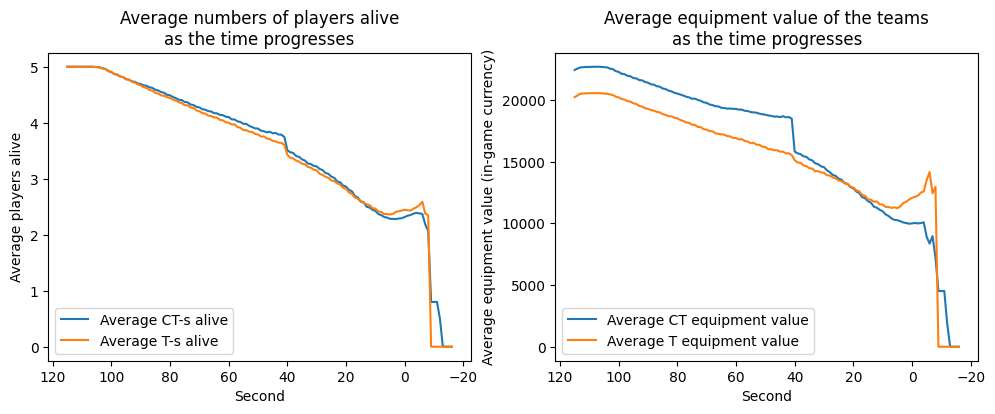

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].plot(temp_df['sec'], temp_df['mean_CT_alive'], label="Average CT-s alive")
axs[0].plot(temp_df['sec'], temp_df['mean_T_alive'], label="Average T-s alive")
axs[0].invert_xaxis()
axs[0].legend(loc='lower left')
axs[0].set_xlabel("Second")
axs[0].set_ylabel("Average players alive")
axs[0].set_title("Average numbers of players alive\nas the time progresses");

axs[1].plot(temp_df['sec'], temp_df['mean_CT_eqv'], label="Average CT equipment value")
axs[1].plot(temp_df['sec'], temp_df['mean_T_eqv'], label="Average T equipment value")
axs[1].invert_xaxis()
axs[1].legend(loc='lower left')
axs[1].set_xlabel("Second")
axs[1].set_ylabel("Average equipment value (in-game currency)")
axs[1].set_title("Average equipment value of the teams\nas the time progresses");

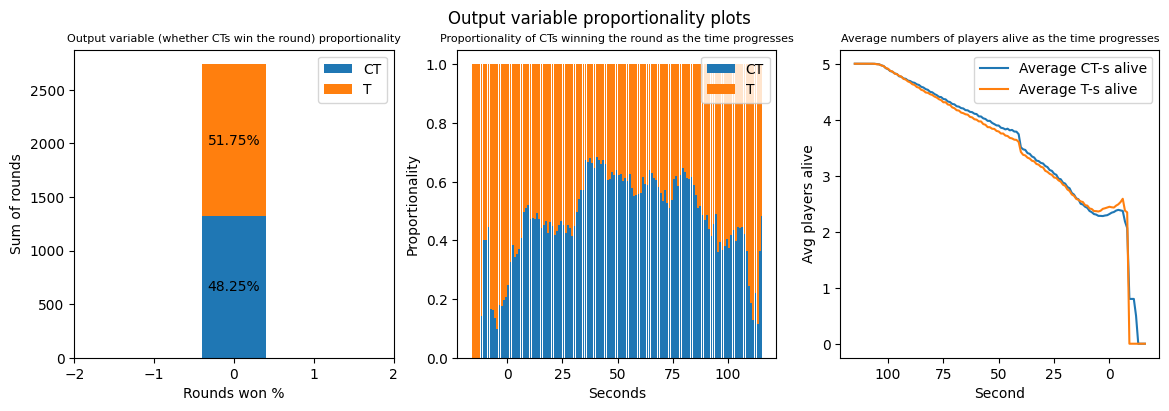

In [80]:
temp_df = df[['match_id', 'roundNum', 'CT_winsRound']].drop_duplicates()

ct_win_sum = temp_df['CT_winsRound'].sum()
t_win_sum = len(temp_df) - ct_win_sum

fig, axs = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle("Output variable proportionality plots")

axs[0].bar(0, ct_win_sum, label="CT")
axs[0].bar(0, t_win_sum, bottom=ct_win_sum, label='T')
axs[0].text(0, ct_win_sum / 2, f"{round(ct_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
axs[0].text(0, ct_win_sum + t_win_sum / 2, f"{round(t_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
axs[0].set_title("Output variable (whether CTs win the round) proportionality", fontsize=8)
axs[0].set_xlim(-2, 2)
axs[0].set_xlabel("Rounds won %")
axs[0].set_ylabel("Sum of rounds")
axs[0].legend()

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_winsRound']].drop_duplicates()
temp_df['one'] = 1
temp_df['group_size'] = temp_df.groupby(by="time_remaining")['one'].transform('sum')
temp_df['group_win'] = temp_df.groupby(by="time_remaining")['CT_winsRound'].transform('sum')
temp_df['group_win_rate'] = temp_df['group_win'] / temp_df['group_size']
temp_df['group_loss_rate'] = 1 - temp_df['group_win_rate']
temp_df

rdf = temp_df[['time_remaining', 'group_win_rate', 'group_loss_rate']].drop_duplicates().sort_values(by='time_remaining', ascending=False)
rdf['sec'] = round(rdf['time_remaining'])
rdf['mean_win_rate'] = rdf.groupby(by='sec')['group_win_rate'].transform('mean')
rdf['mean_loss_rate'] = rdf.groupby(by='sec')['group_loss_rate'].transform('mean')
rdf = rdf.drop_duplicates(subset='sec')
rdf

axs[1].bar(rdf['time_remaining'], rdf['mean_win_rate'], label="CT")
axs[1].bar(rdf['time_remaining'], rdf['mean_loss_rate'], bottom=rdf['mean_win_rate'], label='T')
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Proportionality")
axs[1].set_title("Proportionality of CTs winning the round as the time progresses", fontsize=8)
axs[1].legend();

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_aliveNum', 'T_aliveNum']].drop_duplicates()
temp_df['sec'] = round(temp_df['time_remaining'])
temp_df = temp_df.drop(columns=['time_remaining'])
temp_df = temp_df.drop_duplicates(subset=['match_id', 'roundNum', 'sec'])
temp_df['mean_CT_alive'] = temp_df.groupby(by=['sec'])['CT_aliveNum'].transform('mean')
temp_df['mean_T_alive'] = temp_df.groupby(by=['sec'])['T_aliveNum'].transform('mean')
temp_df = temp_df.drop_duplicates(subset=['sec'])
temp_df


axs[2].plot(temp_df['sec'], temp_df['mean_CT_alive'], label="Average CT-s alive")
axs[2].plot(temp_df['sec'], temp_df['mean_T_alive'], label="Average T-s alive")
axs[2].invert_xaxis()
axs[2].legend()
axs[2].set_xlabel("Second")
axs[2].set_ylabel("Avg players alive")
axs[2].set_title("Average numbers of players alive as the time progresses", fontsize=8);

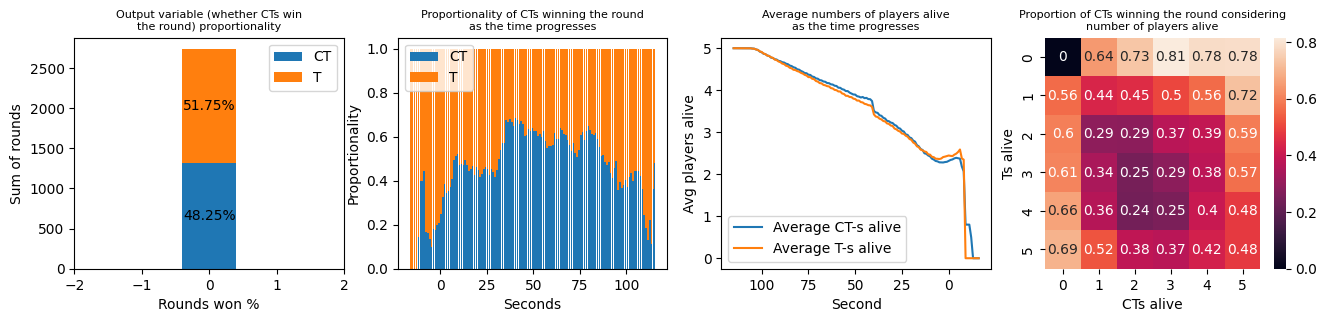

In [85]:
temp_df = df[['match_id', 'roundNum', 'CT_winsRound']].drop_duplicates()

ct_win_sum = temp_df['CT_winsRound'].sum()
t_win_sum = len(temp_df) - ct_win_sum

fig, axs = plt.subplots(1, 4, figsize=(16,3))
#fig.suptitle("Output variable proportionality plots")

axs[0].bar(0, ct_win_sum, label="CT")
axs[0].bar(0, t_win_sum, bottom=ct_win_sum, label='T')
axs[0].text(0, ct_win_sum / 2, f"{round(ct_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
axs[0].text(0, ct_win_sum + t_win_sum / 2, f"{round(t_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
axs[0].set_title("Output variable (whether CTs win\nthe round) proportionality", fontsize=8)
axs[0].set_xlim(-2, 2)
axs[0].set_xlabel("Rounds won %")
axs[0].set_ylabel("Sum of rounds")
axs[0].legend()

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_winsRound']].drop_duplicates()
temp_df['one'] = 1
temp_df['group_size'] = temp_df.groupby(by="time_remaining")['one'].transform('sum')
temp_df['group_win'] = temp_df.groupby(by="time_remaining")['CT_winsRound'].transform('sum')
temp_df['group_win_rate'] = temp_df['group_win'] / temp_df['group_size']
temp_df['group_loss_rate'] = 1 - temp_df['group_win_rate']
temp_df

rdf = temp_df[['time_remaining', 'group_win_rate', 'group_loss_rate']].drop_duplicates().sort_values(by='time_remaining', ascending=False)
rdf['sec'] = round(rdf['time_remaining'])
rdf['mean_win_rate'] = rdf.groupby(by='sec')['group_win_rate'].transform('mean')
rdf['mean_loss_rate'] = rdf.groupby(by='sec')['group_loss_rate'].transform('mean')
rdf = rdf.drop_duplicates(subset='sec')
rdf

axs[1].bar(rdf['time_remaining'], rdf['mean_win_rate'], label="CT")
axs[1].bar(rdf['time_remaining'], rdf['mean_loss_rate'], bottom=rdf['mean_win_rate'], label='T')
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Proportionality")
axs[1].set_title("Proportionality of CTs winning the round\nas the time progresses", fontsize=8)
axs[1].legend();

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_aliveNum', 'T_aliveNum']].drop_duplicates()
temp_df['sec'] = round(temp_df['time_remaining'])
temp_df = temp_df.drop(columns=['time_remaining'])
temp_df = temp_df.drop_duplicates(subset=['match_id', 'roundNum', 'sec'])
temp_df['mean_CT_alive'] = temp_df.groupby(by=['sec'])['CT_aliveNum'].transform('mean')
temp_df['mean_T_alive'] = temp_df.groupby(by=['sec'])['T_aliveNum'].transform('mean')
temp_df = temp_df.drop_duplicates(subset=['sec'])
temp_df


axs[2].plot(temp_df['sec'], temp_df['mean_CT_alive'], label="Average CT-s alive")
axs[2].plot(temp_df['sec'], temp_df['mean_T_alive'], label="Average T-s alive")
axs[2].invert_xaxis()
axs[2].legend()
axs[2].set_xlabel("Second")
axs[2].set_ylabel("Avg players alive")
axs[2].set_title("Average numbers of players alive\nas the time progresses", fontsize=8);

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'CT_aliveNum', 'T_aliveNum', 'CT_winsRound']].drop_duplicates()
mx = np.zeros((6,6))

for t_alive in range(0,6):
    for ct_alive in range(0,6):
        mx[t_alive][ct_alive] = len(df.loc[(df['CT_aliveNum'] == ct_alive) & (df['T_aliveNum'] == t_alive) & (df['CT_winsRound'] == 1)]) /\
                        len(df.loc[(df['CT_aliveNum'] == ct_alive) & (df['T_aliveNum'] == t_alive)])

sns.heatmap(mx, annot=True, ax=axs[3]);
axs[3].set_title("Proportion of CTs winning the round considering\nnumber of players alive", fontsize=8)
axs[3].set_xlabel('CTs alive')
axs[3].set_ylabel('Ts alive');

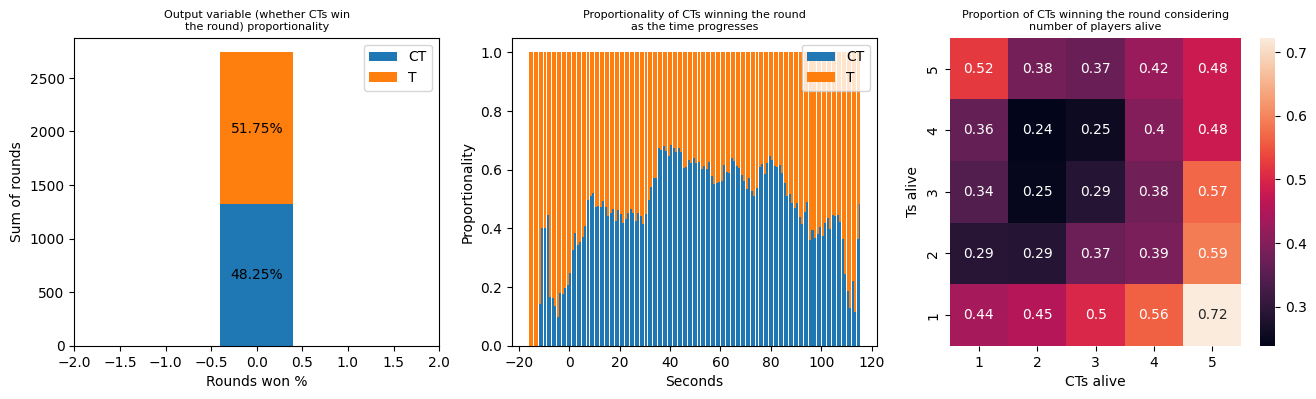

: 

In [134]:
temp_df = df[['match_id', 'roundNum', 'CT_winsRound']].drop_duplicates()

ct_win_sum = temp_df['CT_winsRound'].sum()
t_win_sum = len(temp_df) - ct_win_sum

fig, axs = plt.subplots(1, 3, figsize=(16,4))

axs[0].bar(0, ct_win_sum, label="CT")
axs[0].bar(0, t_win_sum, bottom=ct_win_sum, label='T')
axs[0].text(0, ct_win_sum / 2, f"{round(ct_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
axs[0].text(0, ct_win_sum + t_win_sum / 2, f"{round(t_win_sum/len(temp_df)*100,2)}%", ha='center', va='center')
axs[0].set_title("Output variable (whether CTs win\nthe round) proportionality", fontsize=8)
axs[0].set_xlim(-2, 2)
axs[0].set_xlabel("Rounds won %")
axs[0].set_ylabel("Sum of rounds")
axs[0].legend()

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_winsRound']].drop_duplicates()
temp_df['one'] = 1
temp_df['group_size'] = temp_df.groupby(by="time_remaining")['one'].transform('sum')
temp_df['group_win'] = temp_df.groupby(by="time_remaining")['CT_winsRound'].transform('sum')
temp_df['group_win_rate'] = temp_df['group_win'] / temp_df['group_size']
temp_df['group_loss_rate'] = 1 - temp_df['group_win_rate']
temp_df

rdf = temp_df[['time_remaining', 'group_win_rate', 'group_loss_rate']].drop_duplicates().sort_values(by='time_remaining', ascending=False)
rdf['sec'] = round(rdf['time_remaining'])
rdf['mean_win_rate'] = rdf.groupby(by='sec')['group_win_rate'].transform('mean')
rdf['mean_loss_rate'] = rdf.groupby(by='sec')['group_loss_rate'].transform('mean')
rdf = rdf.drop_duplicates(subset='sec')
rdf

axs[1].bar(rdf['time_remaining'], rdf['mean_win_rate'], label="CT")
axs[1].bar(rdf['time_remaining'], rdf['mean_loss_rate'], bottom=rdf['mean_win_rate'], label='T')
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Proportionality")
axs[1].set_title("Proportionality of CTs winning the round\nas the time progresses", fontsize=8)
axs[1].legend();

# -----------------------------------------------------------------------------------------------------------------

temp_df = df[['match_id', 'roundNum', 'time_remaining', 'CT_aliveNum', 'T_aliveNum', 'CT_winsRound']]
mx = np.zeros((5,5))

for t_alive in range(0,5):
    for ct_alive in range(0,5):
        mx[t_alive][ct_alive] = df.loc[(df['CT_aliveNum'] == ct_alive+1) & (df['T_aliveNum'] == t_alive+1) & (df['CT_winsRound'] == 1)]['CT_winsRound'].sum() /\
                                    len(df.loc[(df['CT_aliveNum'] == ct_alive+1) & (df['T_aliveNum'] == t_alive+1)])

sns.heatmap(mx, annot=True, ax=axs[2]);
axs[2].set_title("Proportion of CTs winning the round considering\nnumber of players alive", fontsize=8)
axs[2].set_xlabel('CTs alive')
axs[2].set_ylabel('Ts alive')
axs[2].set_xticklabels([1,2,3,4,5])
axs[2].set_yticklabels([1,2,3,4,5])
axs[2].invert_yaxis();